# Solar Panel Failure prdeiction Model using Machine Learning.

this project aims to provide a valuable tool for predicting solar panel failure, improving the efficiency and lifespan of renewable energy systems and supporting the continued growth of this critical industry. The successful implementation of this project will lead to an efficient and effective solution for predicting solar panel failures, helping to minimize downtime and maintenance costs, and ultimately, improve the overall performance and sustainability of solar energy systems.

# Import  Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc # Get data From SQL Database
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline ,make_pipeline
import joblib
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data from SQL Server Database.
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=DESKTOP-I8P8486\SQLEXPRESS;"
            "Database=Solar;"
            "Trusted_Connection=yes;")
cnxn = pyodbc.connect(cnxn_str)

In [3]:
df = pd.read_sql_query("select* from Solar_mixed", cnxn)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.889149901,2.184417725,90.60058594,147.65625,-0.57153418,0.657958984,-0.160283203,125.559082,-142.9415894,17.82852173,0.660387646,50.0735731,154.84102,50.00428575,1
1,0.889249897,2.340515137,90.52734375,147.0703125,-0.564820313,0.64453125,-0.133427734,127.8012085,-140.458374,12.53260295,0.660387646,50.0735731,154.84102,50.00428575,1
2,0.889349894,2.444580078,90.22827148,147.65625,-0.591675781,0.64453125,-0.12,130.3205872,-137.8907776,7.554117839,0.660387646,50.0735731,154.84102,50.00428575,1
3,0.889449891,2.392547607,90.20996094,147.3632813,-0.591675781,0.631103516,-0.093144531,133.0328369,-136.0223389,3.174336751,0.660371125,50.07062239,154.8474991,50.00379384,1
4,0.889549888,2.218475342,90.35644531,147.65625,-0.61853125,0.617675781,-0.086430664,136.1549377,-134.0092468,-0.948282877,0.660371125,50.07062239,154.8474991,50.00379384,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56629,0.201265909644743,2.30551147460938,87.1826171875,148.828125,-0.3164072265625,0.711669921875,-0.401982421875,45.2041625976562,-149.414825439453,110.338338216109,0.735377961569287,49.8569695443118,155.878949010323,49.9985272083769,0
56630,0.201365612968704,2.3310546875,86.810302734375,148.828125,-0.32312109375,0.711669921875,-0.4221240234375,49.0736389160156,-150.330963134766,106.999257405554,0.73520108865973,49.8543094473797,155.875660792277,49.9986022501958,0
56631,0.201465902782807,2.35281372070312,86.956787109375,148.53515625,-0.3499765625,0.711669921875,-0.3684130859375,54.5343017578125,-151.415863037109,103.266398111979,0.73520108865973,49.8543094473797,155.875660792277,49.9986022501958,0
56632,0.201565606106771,2.399169921875,86.87744140625,149.12109375,-0.3566904296875,0.6982421875,-0.3885546875,57.9457092285156,-152.500762939453,99.4652303060912,0.73520108865973,49.8543094473797,155.875660792277,49.9986022501958,0


In [5]:
df = df.drop(["Time"],axis=1)

In [6]:
df['label'].value_counts()

0    28318
1    28316
Name: label, dtype: int64

# Auto-EDA

In [2]:
#import dtale

In [8]:
#d = dtale.show(df)
# d.open_browser

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56634 entries, 0 to 56633
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ipv     56634 non-null  object
 1   Vpv     56634 non-null  object
 2   Vdc     56634 non-null  object
 3   ia      56634 non-null  object
 4   ib      56634 non-null  object
 5   ic      56634 non-null  object
 6   va      56634 non-null  object
 7   vb      56634 non-null  object
 8   vc      56634 non-null  object
 9   Iabc    56634 non-null  object
 10  If      56634 non-null  object
 11  Vabc    56634 non-null  object
 12  Vf      56634 non-null  object
 13  label   56634 non-null  object
dtypes: object(14)
memory usage: 6.0+ MB


In [10]:
#convert the data type of the columns in to float.
for col in df.columns:
     df[col] = df[col].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56634 entries, 0 to 56633
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ipv     56634 non-null  float64
 1   Vpv     56634 non-null  float64
 2   Vdc     56634 non-null  float64
 3   ia      56634 non-null  float64
 4   ib      56634 non-null  float64
 5   ic      56634 non-null  float64
 6   va      56634 non-null  float64
 7   vb      56634 non-null  float64
 8   vc      56634 non-null  float64
 9   Iabc    56634 non-null  float64
 10  If      56634 non-null  float64
 11  Vabc    56634 non-null  float64
 12  Vf      56634 non-null  float64
 13  label   56634 non-null  float64
dtypes: float64(14)
memory usage: 6.0 MB


In [12]:
df.describe()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
count,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000
mean,1.896756,94.463172,145.809456,-0.014438,0.006081,-0.021652,1.069118,0.081755,1.080606,0.590102,50.047352,145.012614,49.983641,0.499982
std,0.409502,7.110356,2.232900,0.421103,0.428698,0.407813,109.806693,109.915514,109.804489,0.153457,0.306013,36.144276,0.103550,0.500004
min,0.930908,73.126221,131.835938,-0.806520,-0.892944,-0.811528,-161.216126,-161.216126,-159.275360,0.186329,48.667134,1.000000,49.444572,0.000000
25%,1.489075,89.996338,143.847656,-0.403687,-0.389404,-0.388555,-108.514099,-109.764748,-108.722038,0.475204,49.933540,154.760574,49.984971,0.000000
50%,1.880737,92.218018,145.019531,-0.014283,0.013428,-0.039434,1.579132,-0.397797,1.426442,0.530493,50.011667,155.167365,50.000000,0.000000
75%,2.288483,101.257324,147.949219,0.381835,0.402832,0.363398,111.057587,110.271034,110.960147,0.694674,50.144771,155.491166,50.008791,1.000000
max,3.213715,103.656006,154.394531,0.818236,0.812378,0.746089,159.636993,159.636993,158.998108,1.000000,51.348239,156.261373,50.464243,1.000000


In [13]:
#finding correlation between the the attributes
df.corr()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
Ipv,1.000000,-0.813340,0.878458,0.003634,-0.005687,-0.020242,0.001973,-0.004103,-0.000448,0.569301,0.242022,-0.000909,-0.039540,-0.019567
Vpv,-0.813340,1.000000,-0.648988,-0.001984,-0.002940,0.011223,-0.002161,0.004847,-0.001091,-0.380286,-0.330504,0.027042,0.011787,0.208622
Vdc,0.878458,-0.648988,1.000000,-0.012625,0.017852,-0.028406,0.022330,-0.028746,0.008690,0.606782,0.197754,-0.010362,-0.025905,-0.107153
ia,0.003634,-0.001984,-0.012625,1.000000,-0.525390,-0.478198,-0.980717,0.507105,0.473116,0.003201,-0.002789,0.000778,-0.004909,0.008872
ib,-0.005687,-0.002940,0.017852,-0.525390,1.000000,-0.491468,0.507696,-0.978375,0.479839,-0.001149,0.004900,0.008446,0.001219,-0.011101
ic,-0.020242,0.011223,-0.028406,-0.478198,-0.491468,1.000000,0.477743,0.491502,-0.978519,-0.022577,0.002526,-0.017141,0.002962,-0.033254
va,0.001973,-0.002161,0.022330,-0.980717,0.507696,0.477743,1.000000,-0.509140,-0.490381,0.001084,0.000611,0.000935,0.005508,0.000785
vb,-0.004103,0.004847,-0.028746,0.507105,-0.978375,0.491502,-0.509140,1.000000,-0.500099,-0.005352,-0.001047,-0.009752,-0.001889,0.002835
vc,-0.000448,-0.001091,0.008690,0.473116,0.479839,-0.978519,-0.490381,-0.500099,1.000000,0.005766,0.000450,0.009466,-0.004426,-0.005132
Iabc,0.569301,-0.380286,0.606782,0.003201,-0.001149,-0.022577,0.001084,-0.005352,0.005766,1.000000,0.044003,-0.606075,0.074503,0.019304


In [14]:
df.var()

Ipv          0.167692
Vpv         50.557163
Vdc          4.985844
ia           0.177328
ib           0.183782
ic           0.166312
va       12057.509837
vb       12081.420287
vc       12057.025789
Iabc         0.023549
If           0.093644
Vabc      1306.408671
Vf           0.010723
label        0.250004
dtype: float64

In [15]:
df.std()

Ipv        0.409502
Vpv        7.110356
Vdc        2.232900
ia         0.421103
ib         0.428698
ic         0.407813
va       109.806693
vb       109.915514
vc       109.804489
Iabc       0.153457
If         0.306013
Vabc      36.144276
Vf         0.103550
label      0.500004
dtype: float64

# Countplot

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


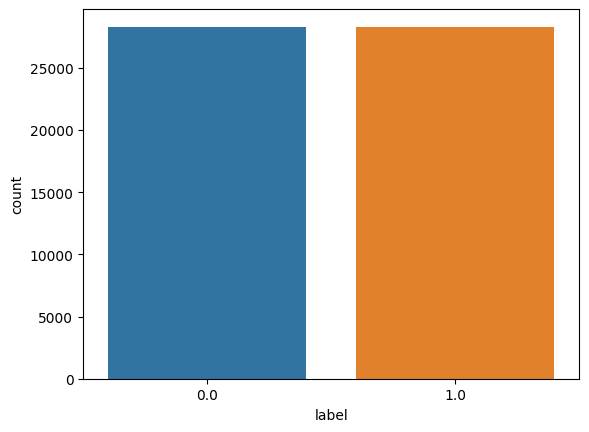

In [16]:
sns.countplot(df["label"],data = df)
plt.show()


In [17]:
y = df.iloc[:,-1:]

In [18]:
X = df.drop(["label"],axis=1)

In [19]:
y.value_counts()

label
0.0      28318
1.0      28316
dtype: int64

# Histogram

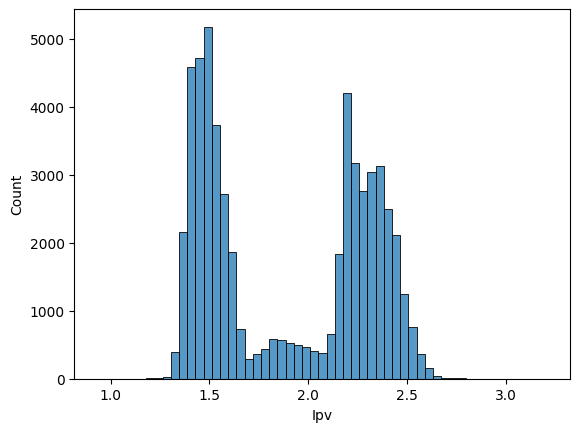

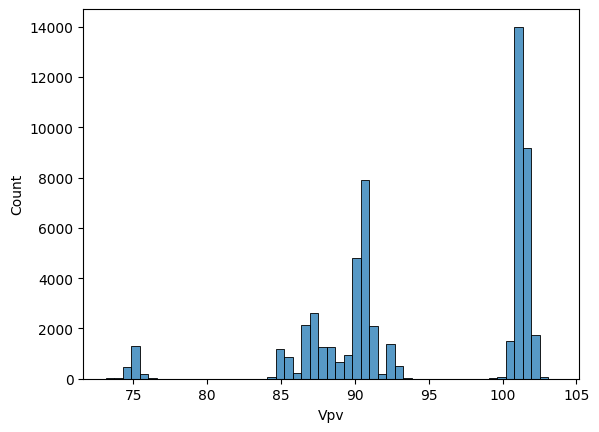

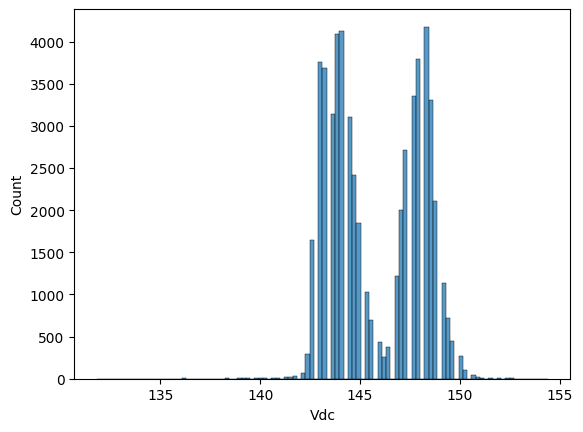

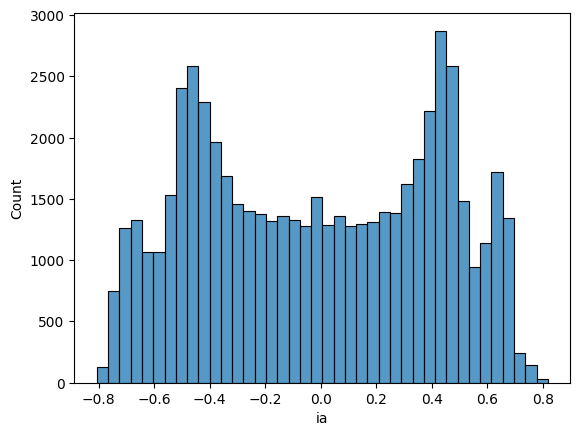

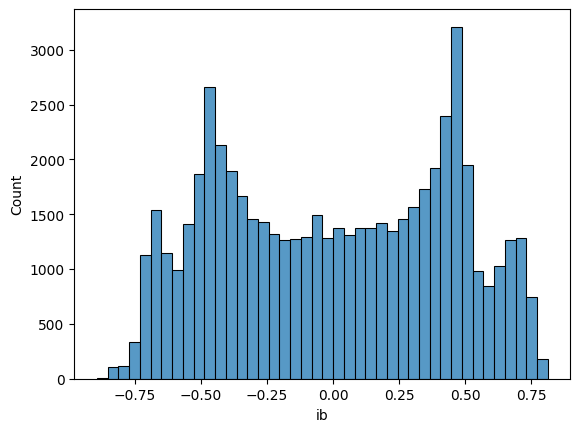

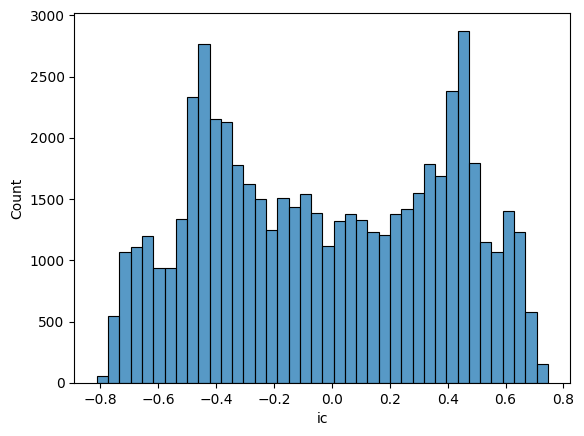

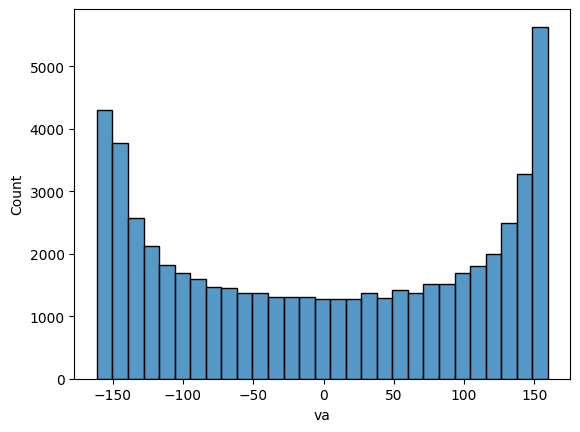

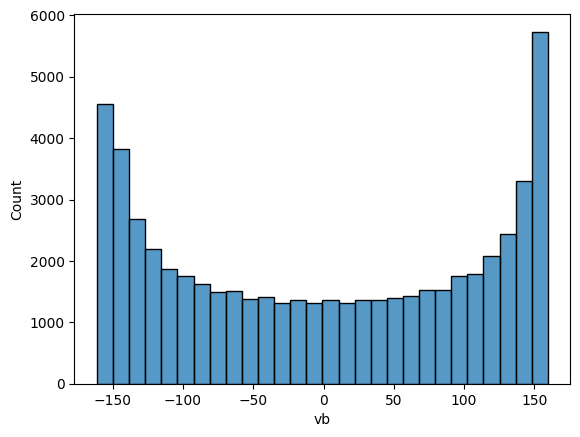

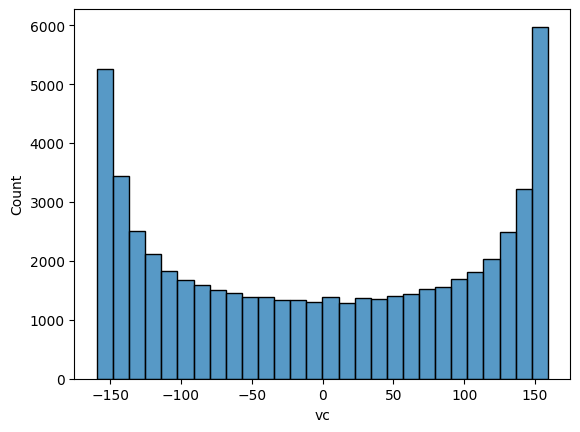

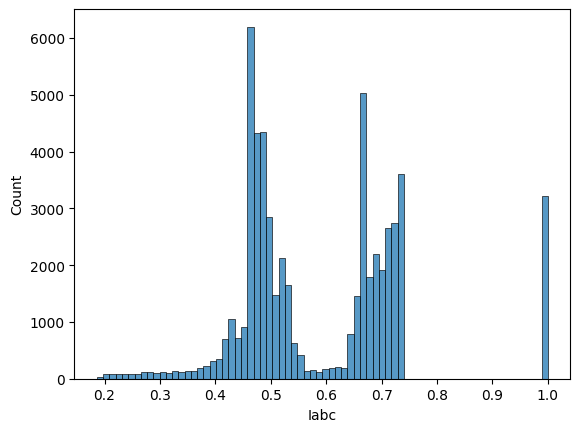

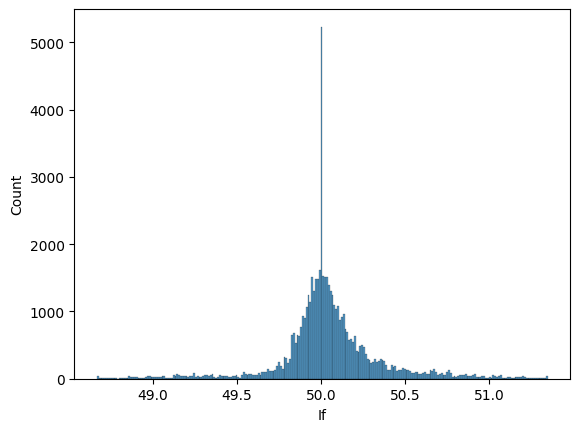

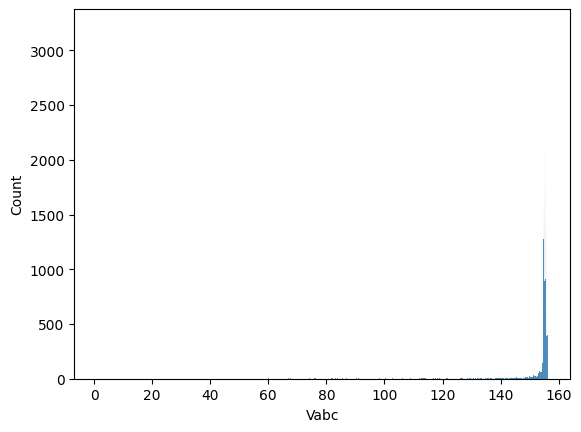

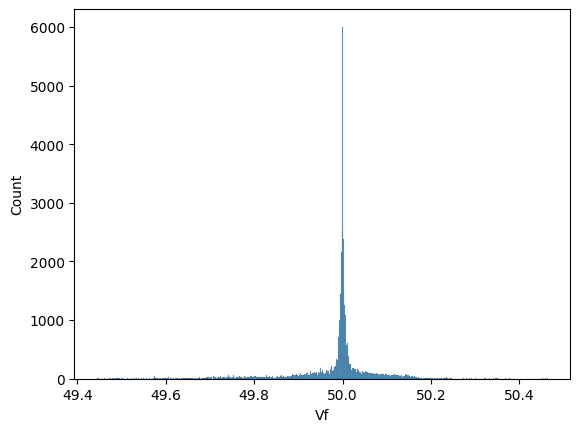

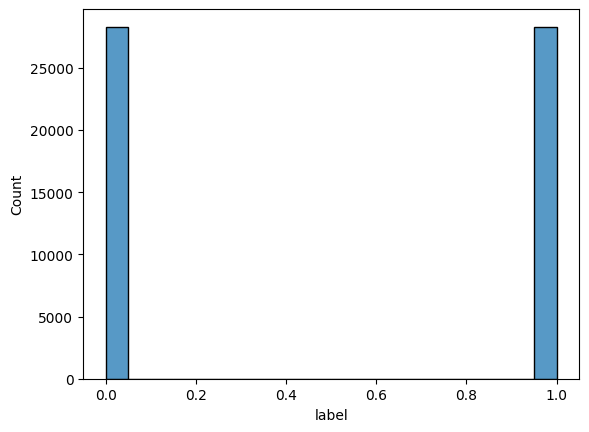

In [20]:
for i in df:
    sns.histplot(df[i],kde=False)
    plt.show()

# Boxplot

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


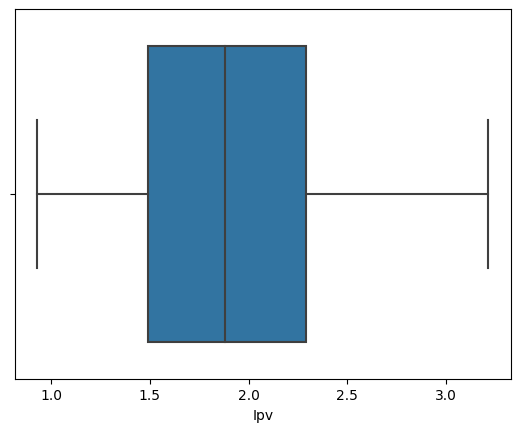

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


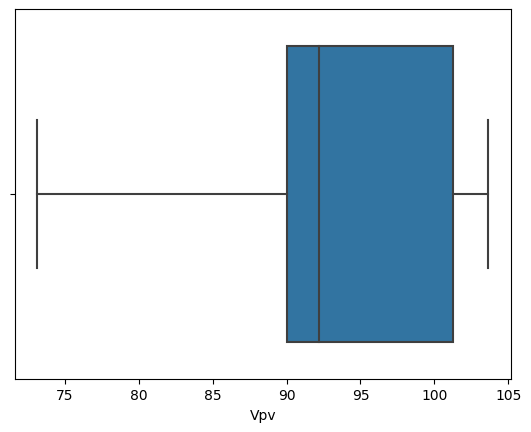

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


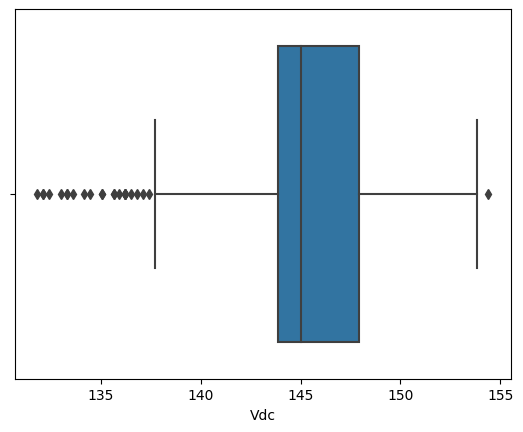

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


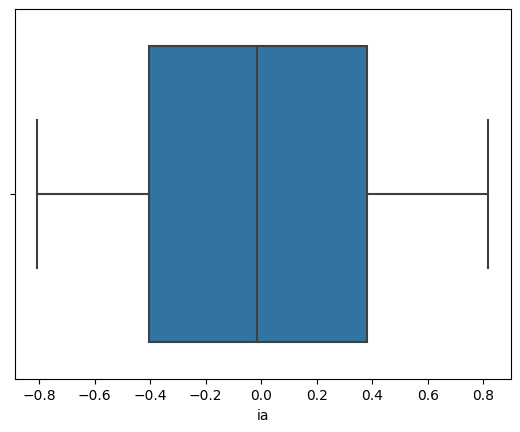

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


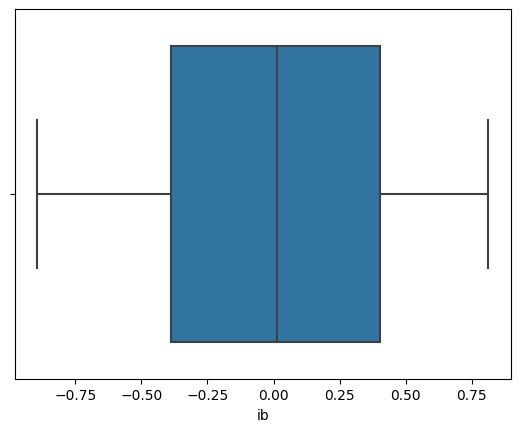

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


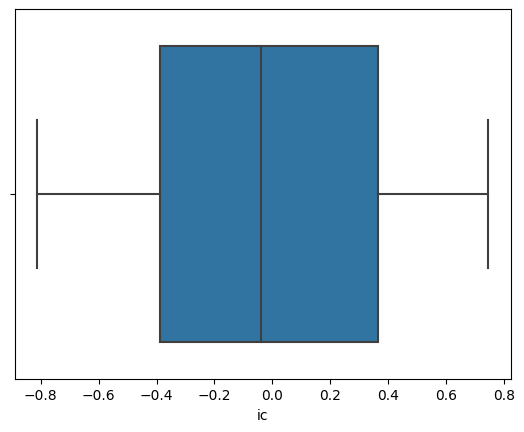

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


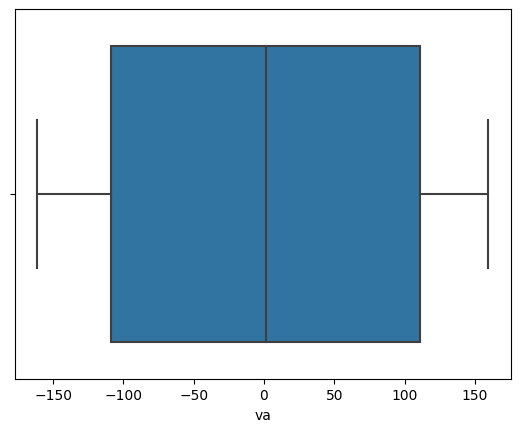

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


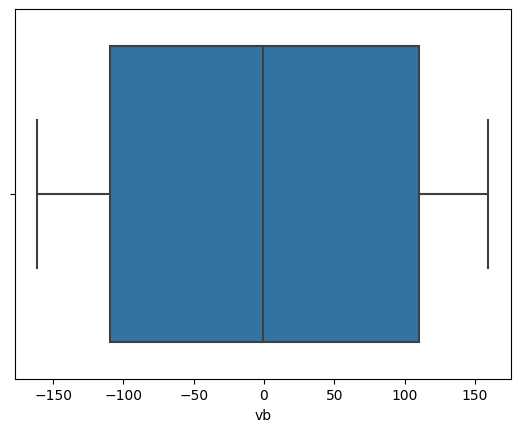

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


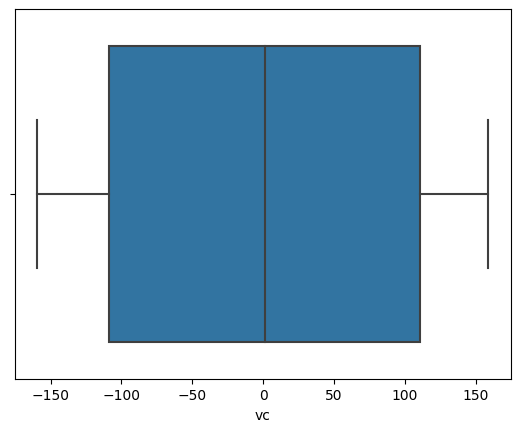

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


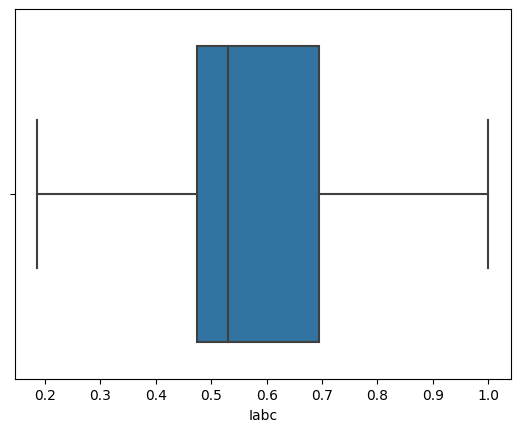

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


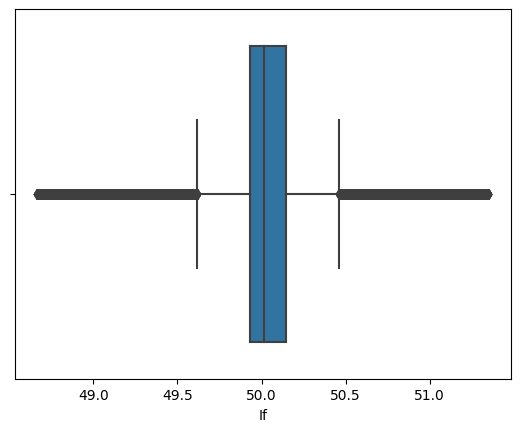

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


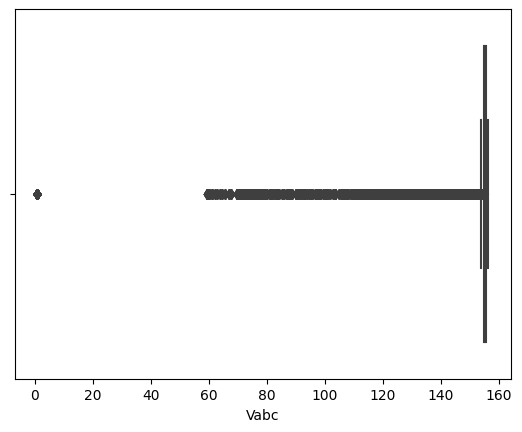

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


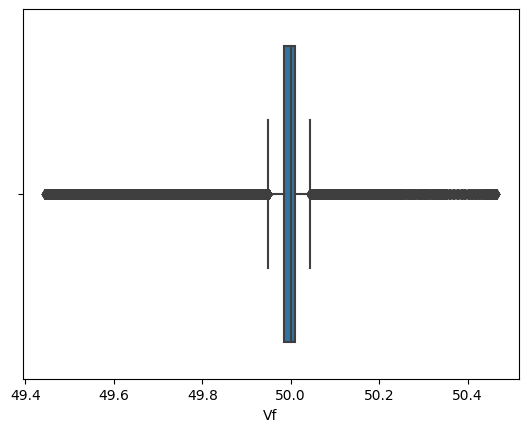

"Checking for the Outliers\nWe can clearly seen that 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'if', 'Vabc' and 'Vf' have Outliers.\nWe don't have outliers in 'Time', 'va', 'vb' and 'vc' attributes.\n"

In [21]:
for i in X:
    sns.boxplot(X[i])
    plt.show()

"""Checking for the Outliers
We can clearly seen that 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'if', 'Vabc' and 'Vf' have Outliers.
We don't have outliers in 'Time', 'va', 'vb' and 'vc' attributes.
"""

# Heatmap

<AxesSubplot: >

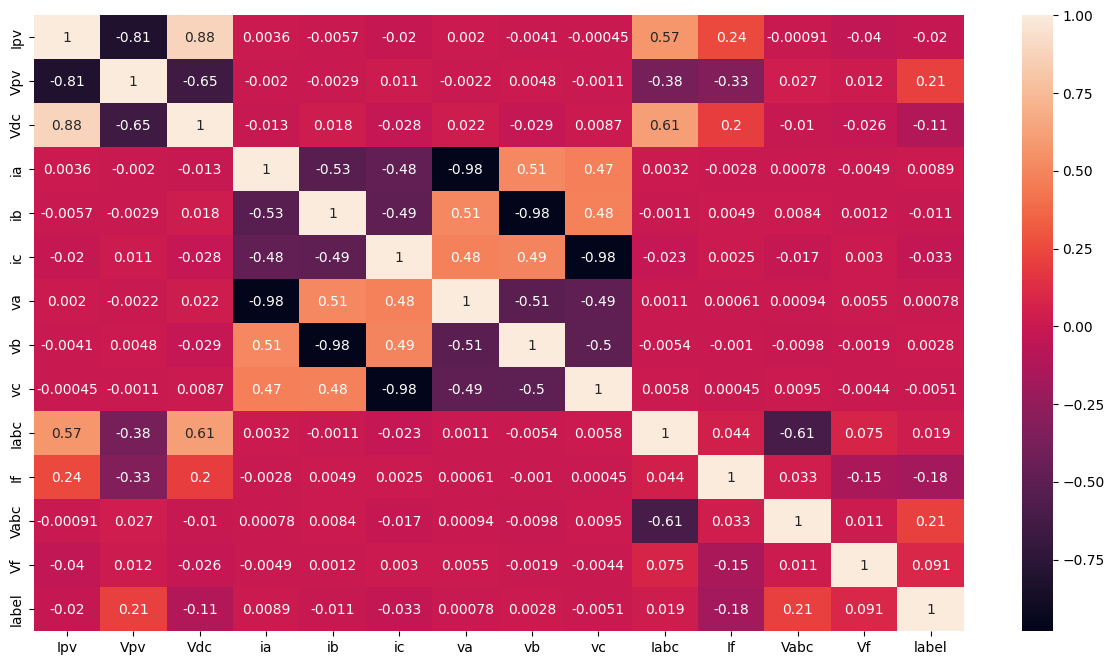

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot =True)

# Heatmap Observations:

Phase_A voltage measurement (va) has strong negative Correlation with Phase_A 
      current measurement (ia) of -0.75

Phase_B voltage measurement (vb) has strong negative Correlation with Phase_B 
      current measurement (ib) of -0.74

Phase_C voltage measurement (vc) has strong negative Correlation with Phase_C 
      current measurement (ic) of -0.71

By observing the heat map we can see that Phase_A, Phase_B and Phase_C voltages have strong negative correlation with their respective current ia, ib and ic.

According to ohm’s law voltage and current are inversely proportional to each other.

4. DC voltage measurement (vdc) has strong positive Correlation with PV array  voltage measurement  (Vpv)  of 0.69


# Probability and Distribution Plot

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


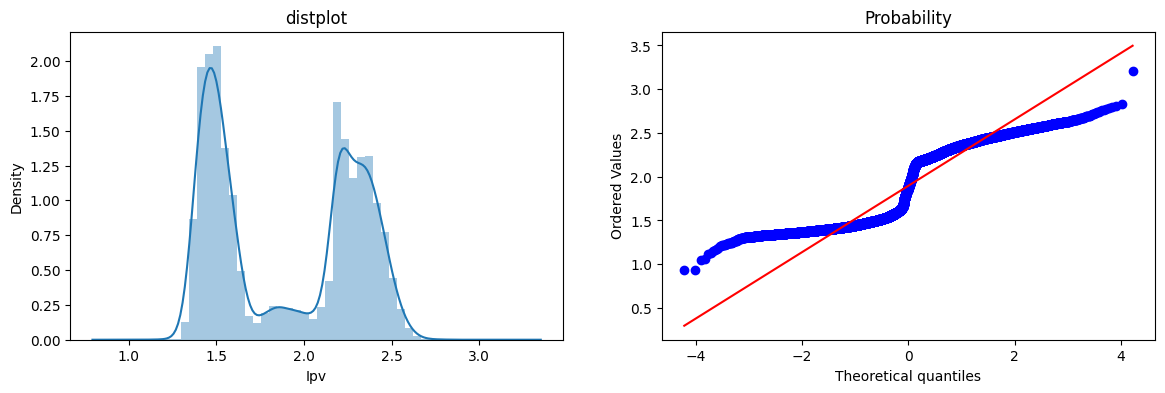

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


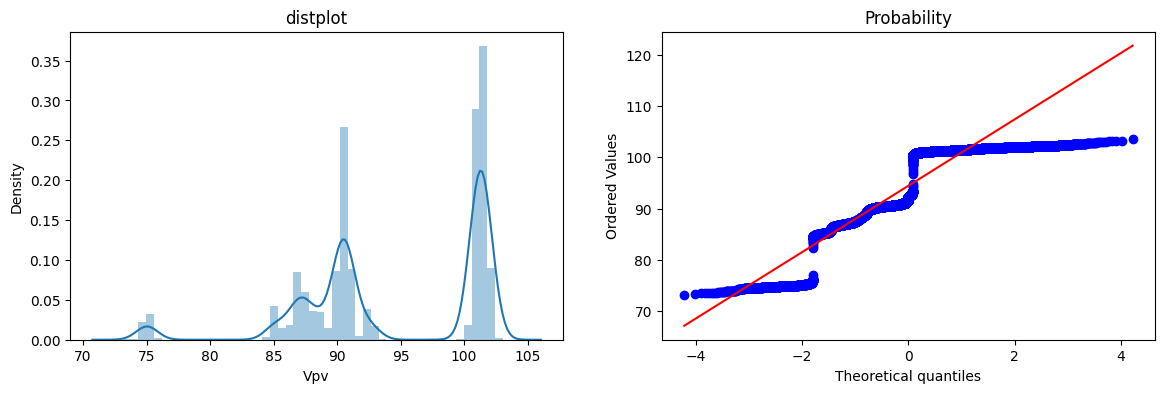

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


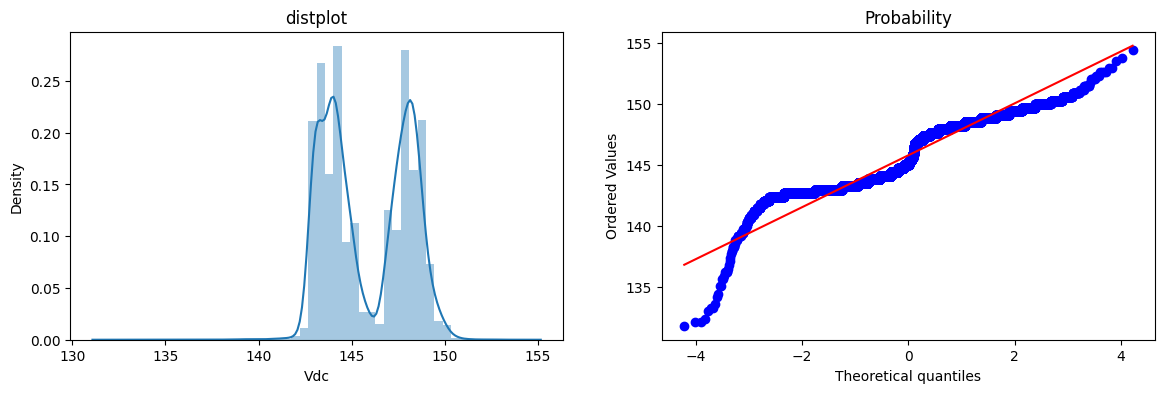

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


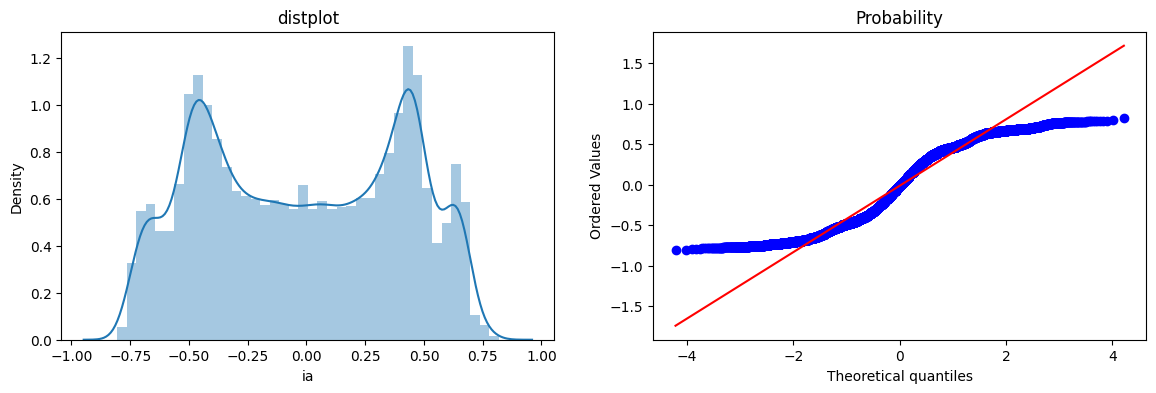

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


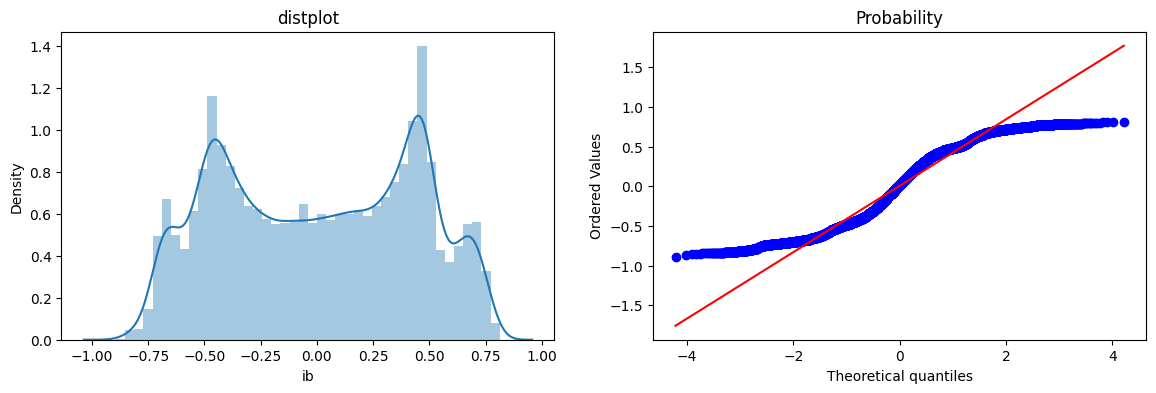

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


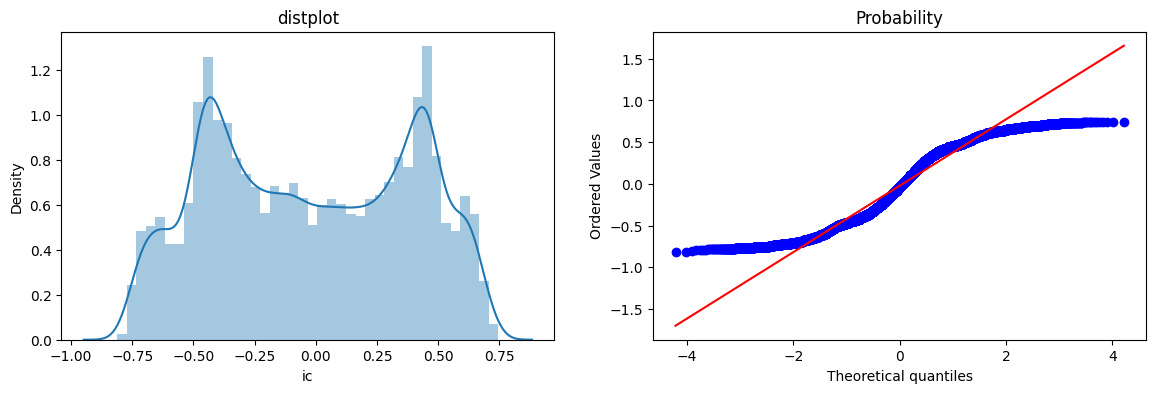

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


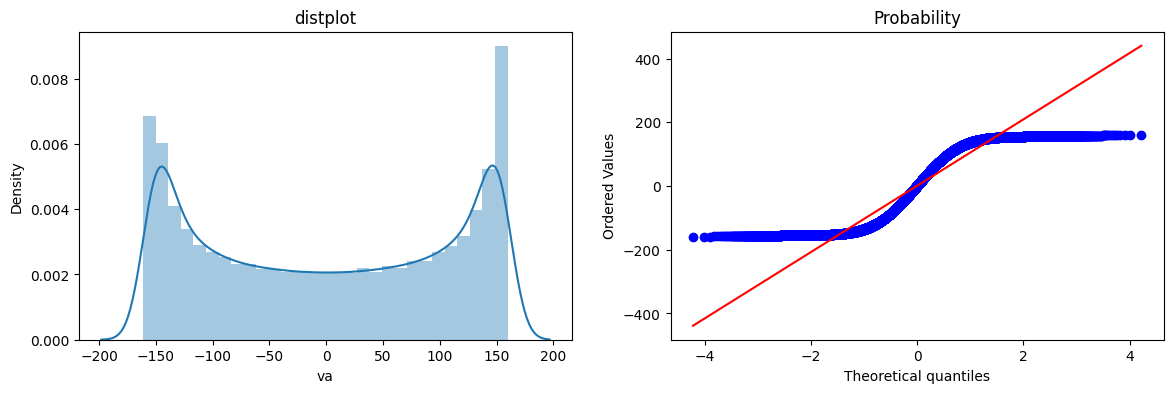

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


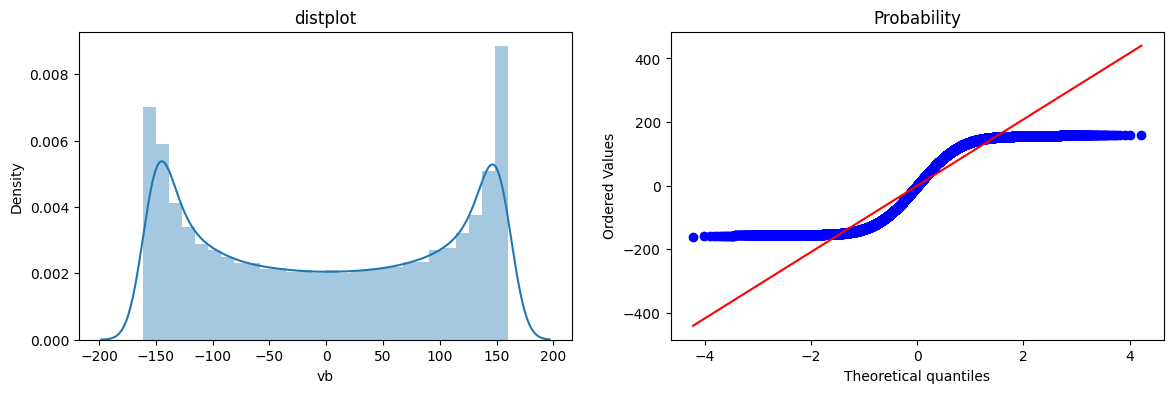

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


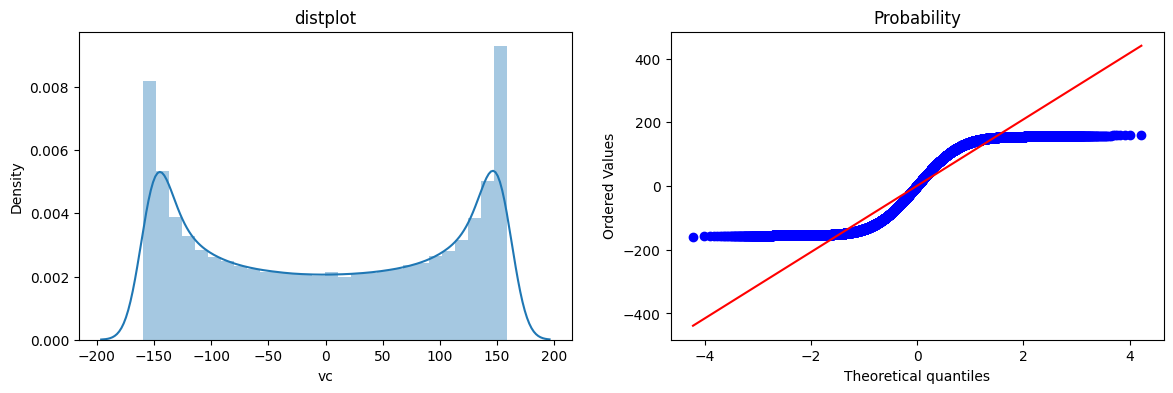

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


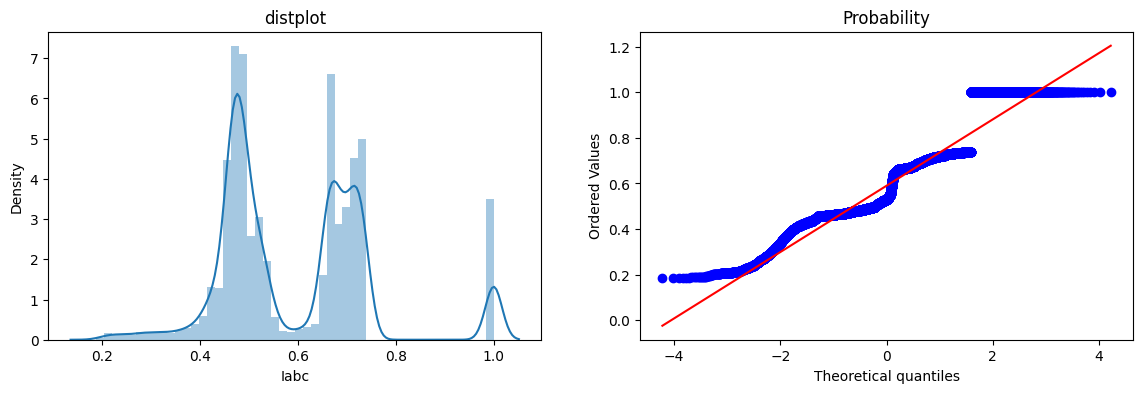

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


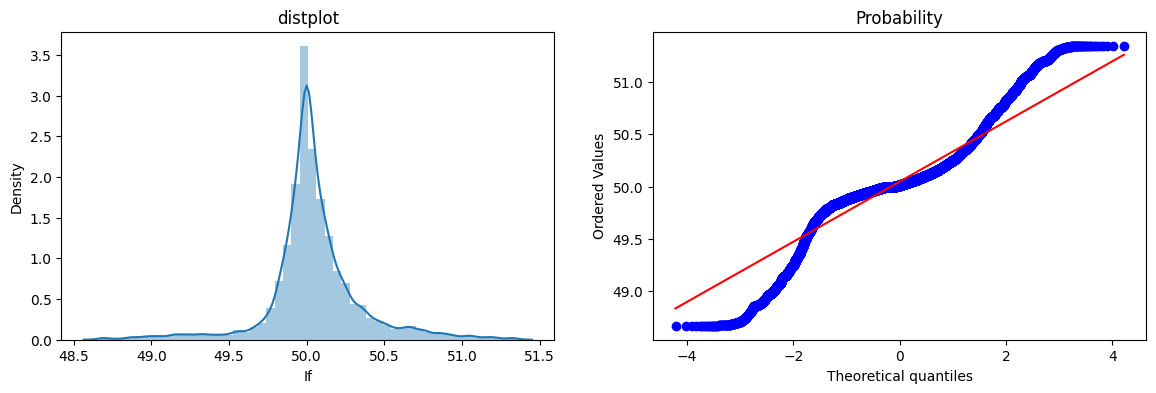

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


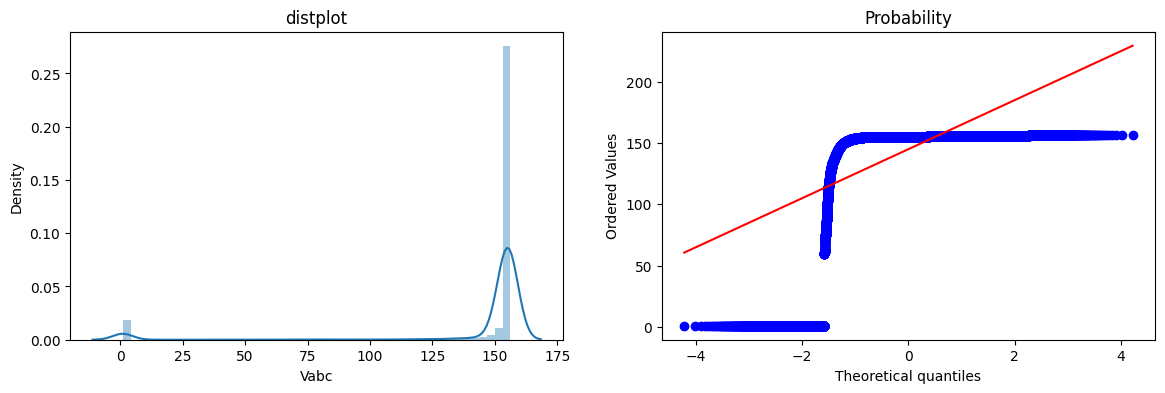

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


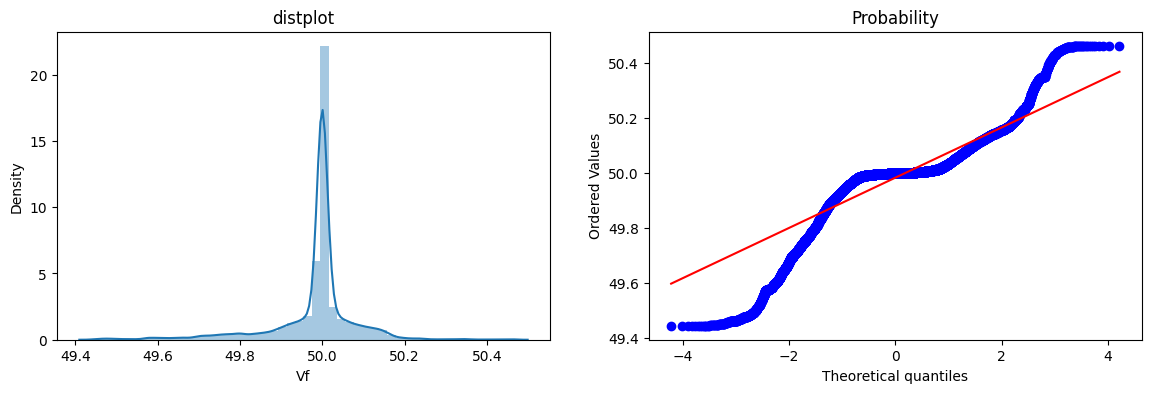

In [23]:
for i in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[i])
    plt.title("distplot")
   

    plt.subplot(122)
    stats.probplot(X[i], dist="norm", plot=plt)
    plt.title("Probability")
    

    plt.show()

# Transformation

In [24]:
trf = FunctionTransformer(func=np.log1p)

X_transformed = trf.fit_transform(X)


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


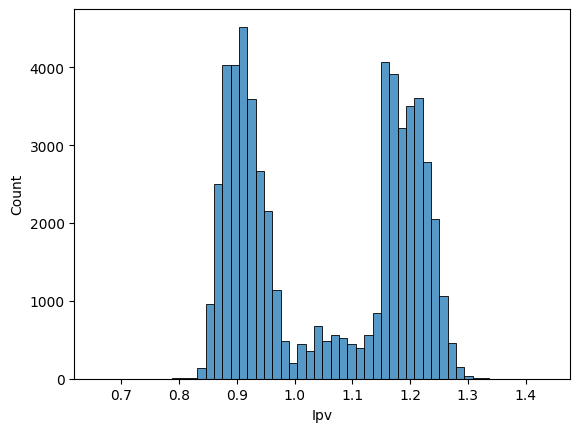

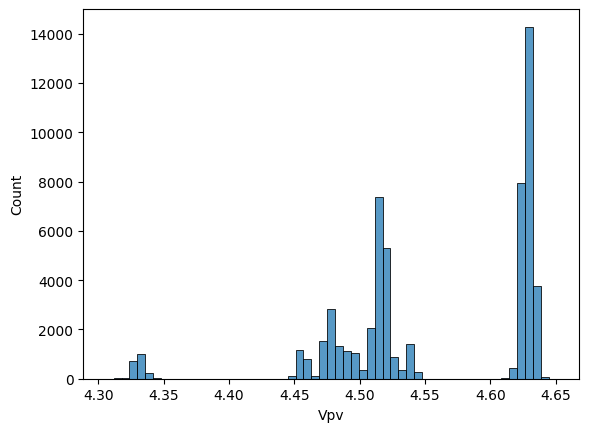

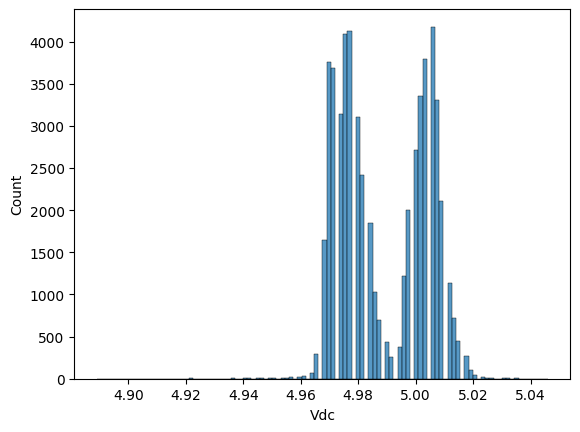

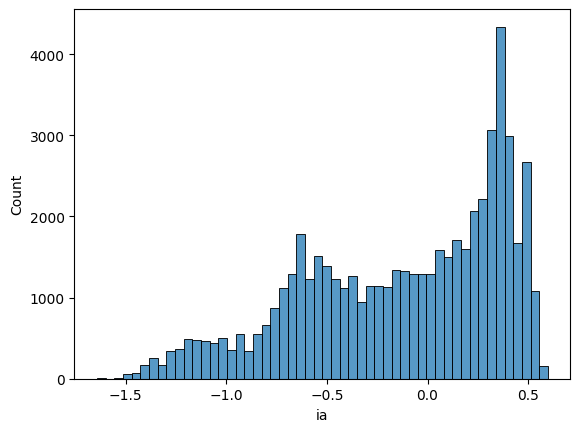

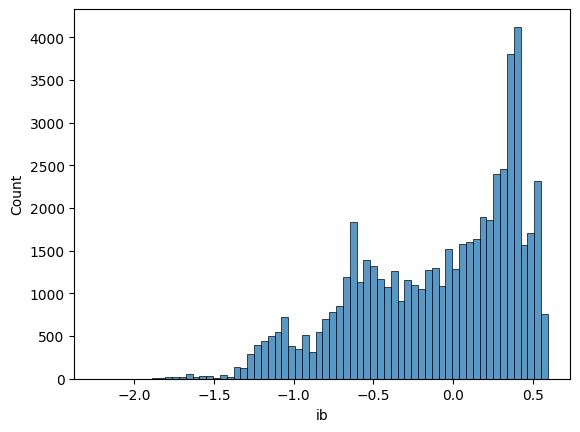

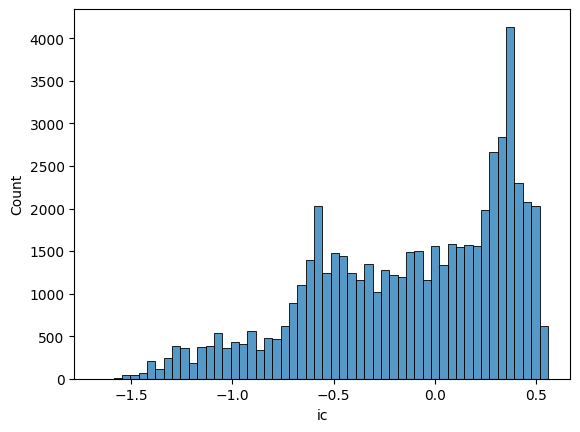

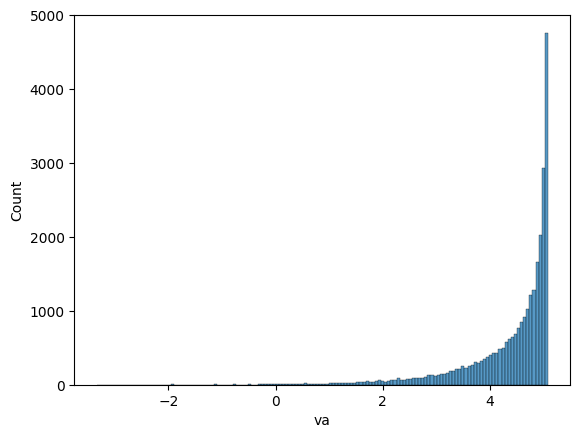

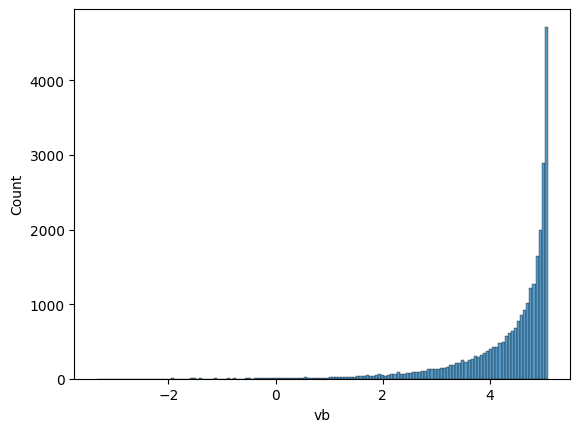

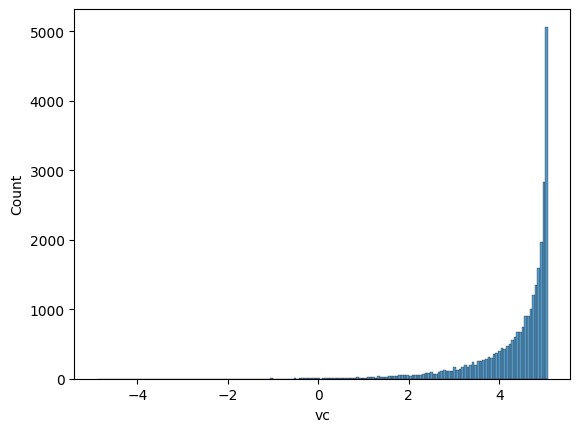

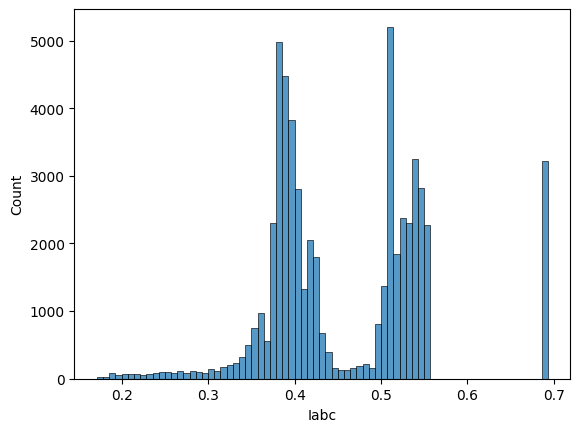

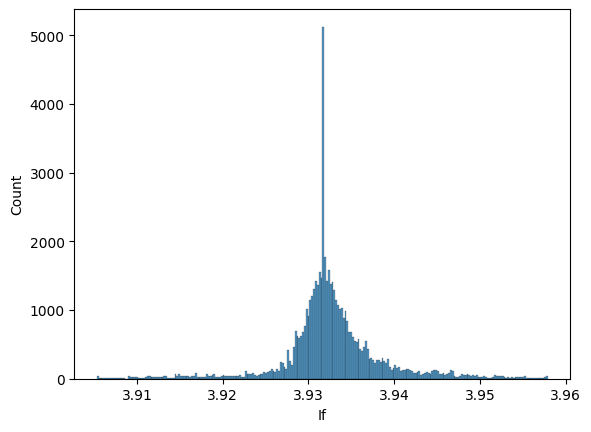

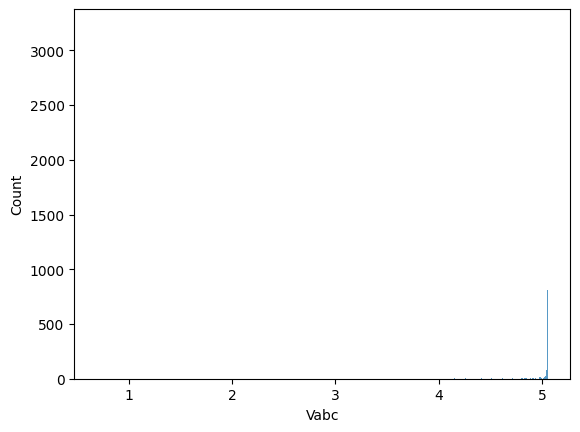

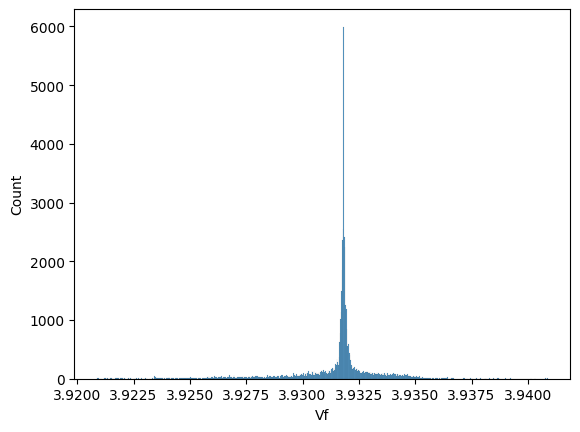

In [25]:
for i in X_transformed:
    sns.histplot(X_transformed[i])
    plt.show()

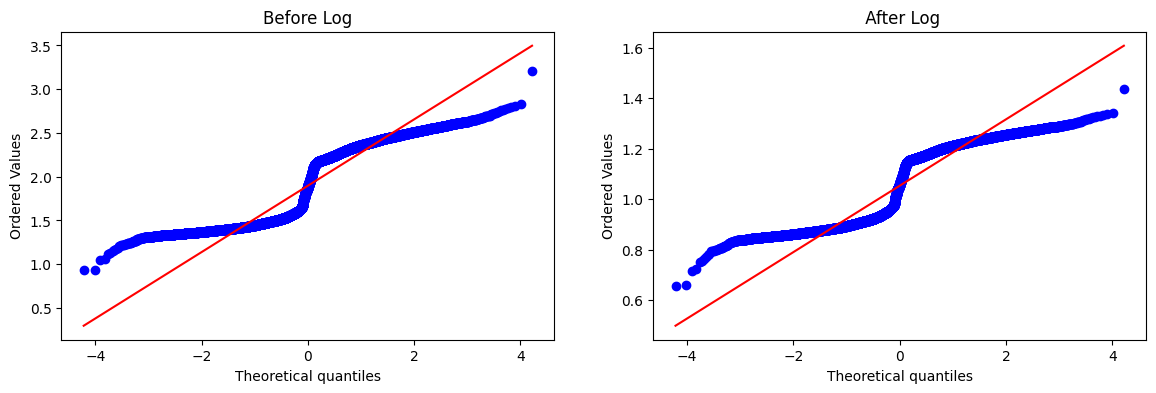

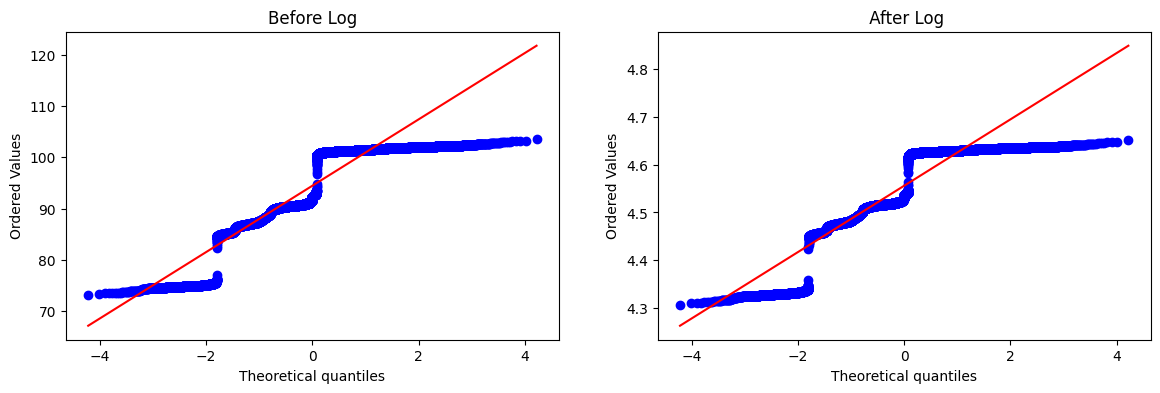

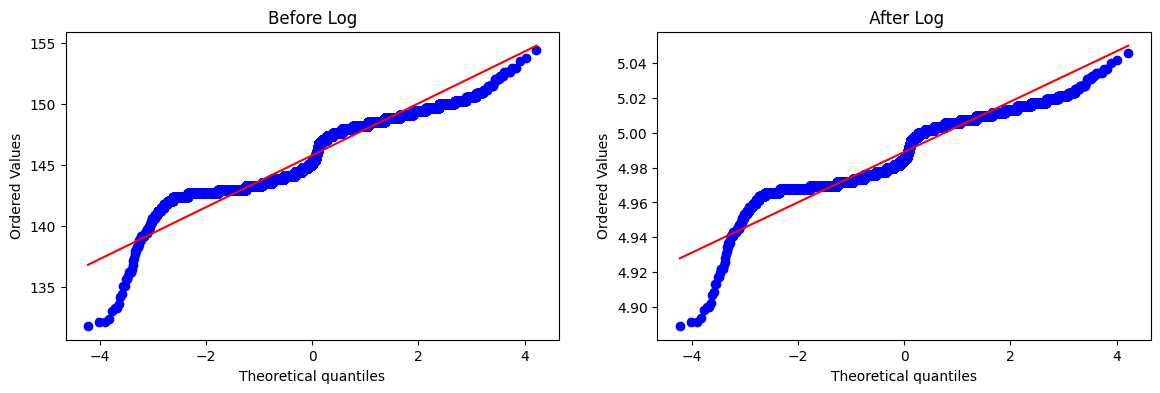

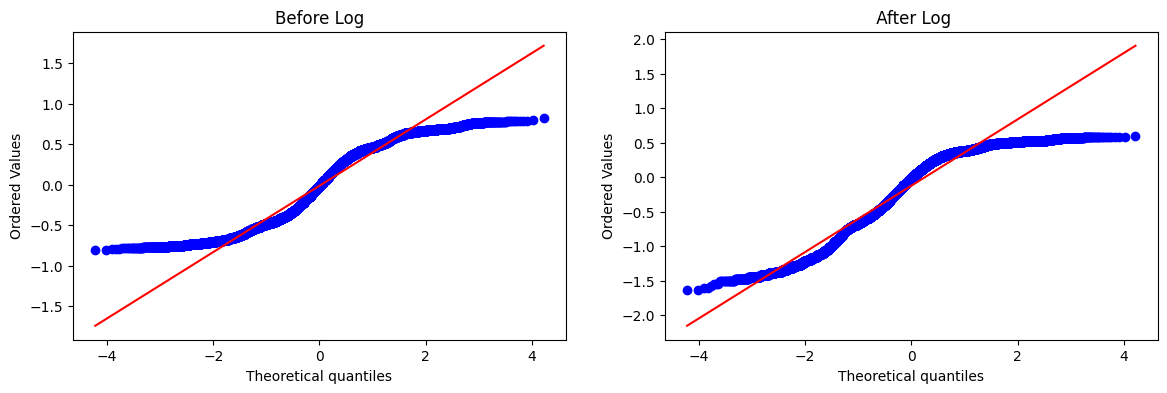

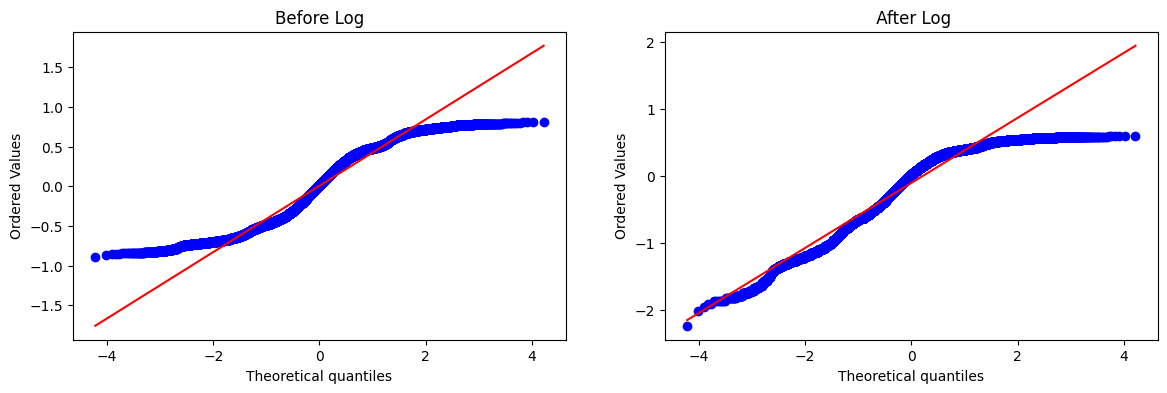

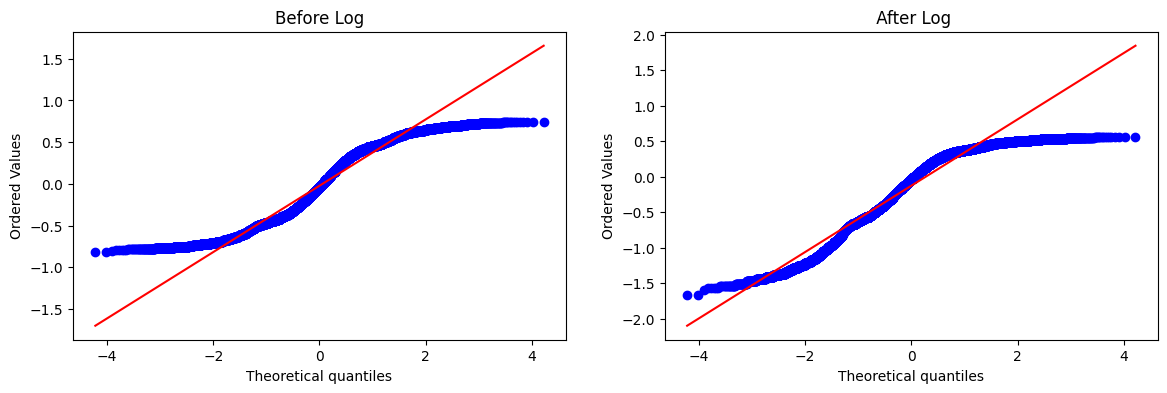

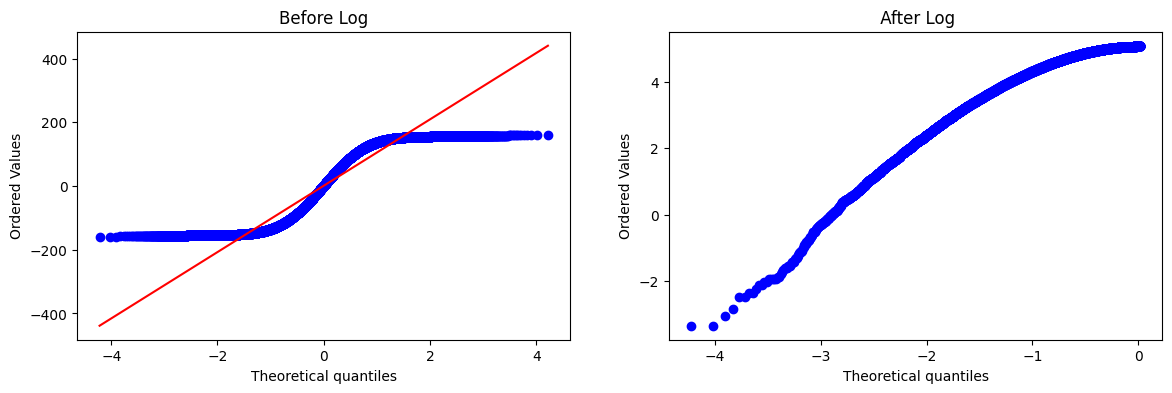

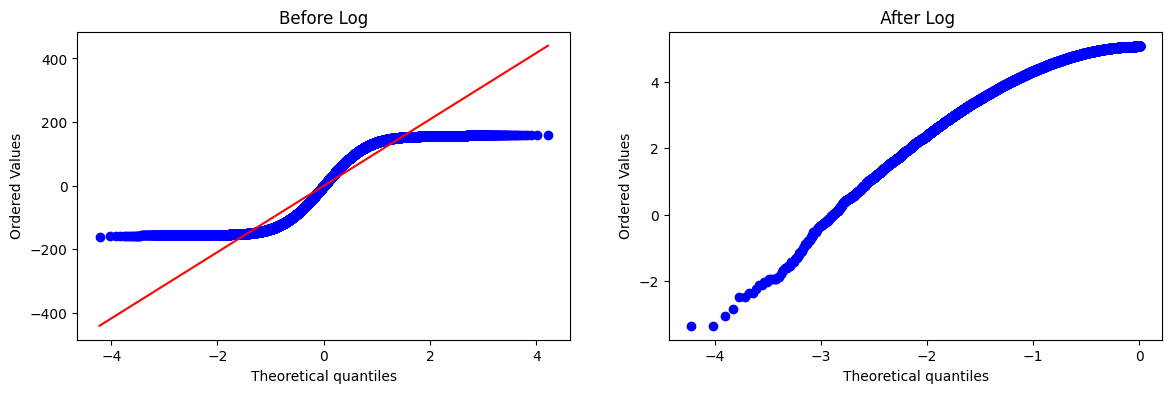

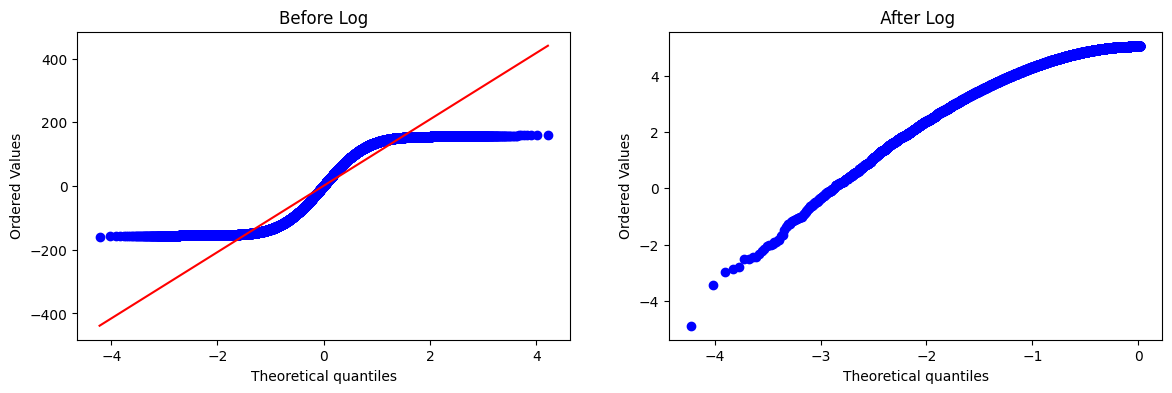

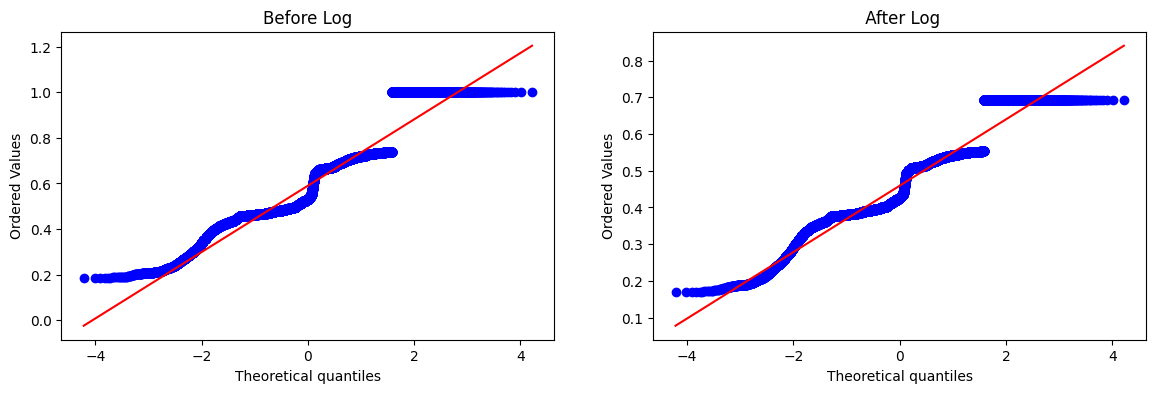

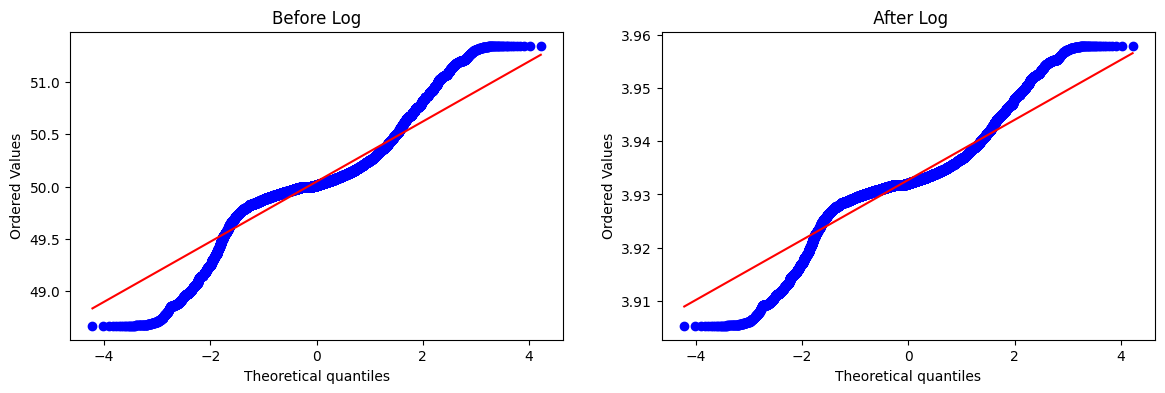

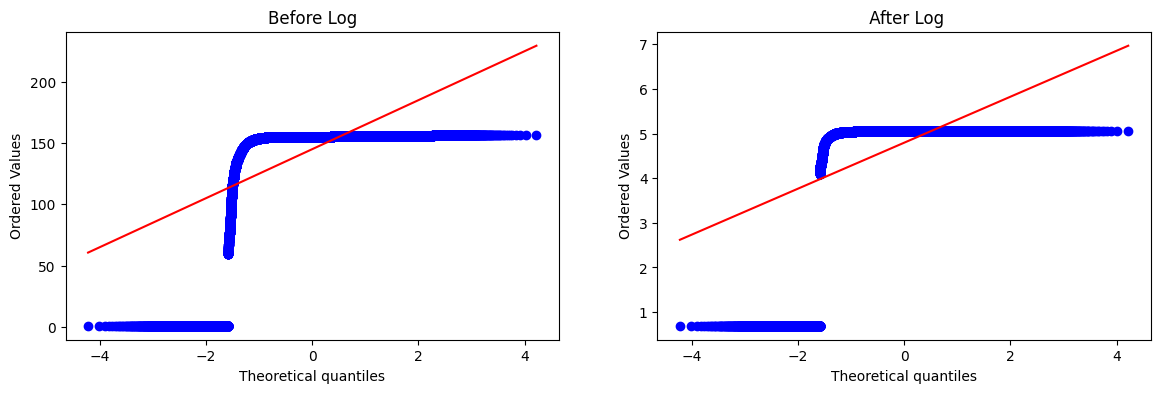

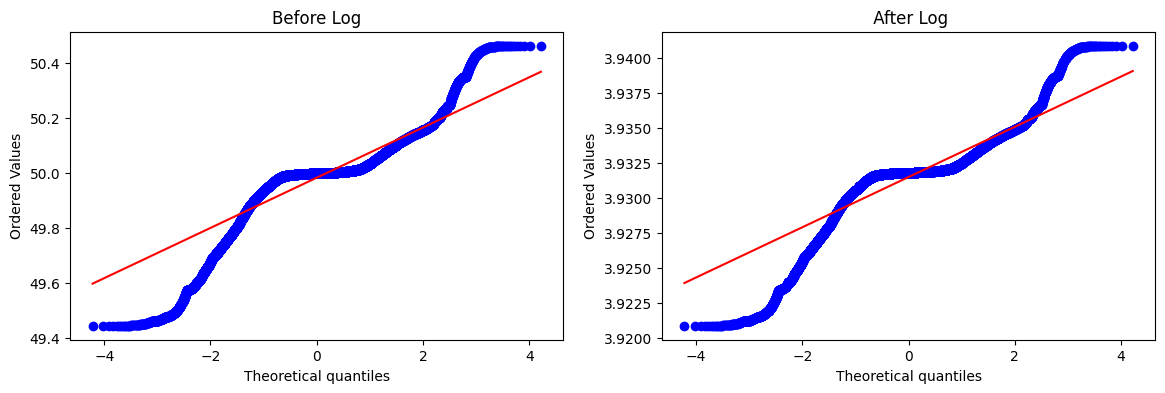

In [26]:
for i in X.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X[i], dist="norm", plot=plt)
    plt.title('Before Log')

    plt.subplot(122)
    stats.probplot(X_transformed[i], dist="norm", plot=plt)
    plt.title(' After Log')

    plt.show()

# Train_Test_Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Standard Scaler

In [28]:
scale_data = Pipeline([("scale",StandardScaler())])

In [29]:
scale_transform = ColumnTransformer([("scale",scale_data,X_train.columns)])

In [30]:
scale = scale_transform.fit(X_train)

In [31]:
joblib.dump(scale,"std")

['std']

# Logistic Regression

In [32]:
lg = LogisticRegression()

In [33]:
lg.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = lg.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.776904740884612

# SVM

In [36]:
svc = SVC()

In [37]:
svc.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [38]:
y_pred_svc = svc.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred_svc)

0.6394455725258232

# Random Forests

In [40]:
rfc = RandomForestClassifier(n_estimators = 50, random_state = 14, n_jobs = -1)

rfc.fit(X_train, y_train)



C:\Users\HP\AppData\Local\Temp\ipykernel_22288\259713397.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=14)

In [41]:
y_pred_rfc = rfc.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_rfc)

0.9962920455548689

In [43]:
accuracy_score(y_train, rfc.predict(X_train))

1.0

In [44]:
confusion_matrix(y_pred_rfc,y_test)

array([[5661,   22],
       [  20, 5624]], dtype=int64)

# XGB

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
y_pred_xgb = xgb.predict(X_test)

In [47]:
print("test_accuracy:" ,accuracy_score(y_test,y_pred_xgb))

test_accuracy: 0.9980577381477884


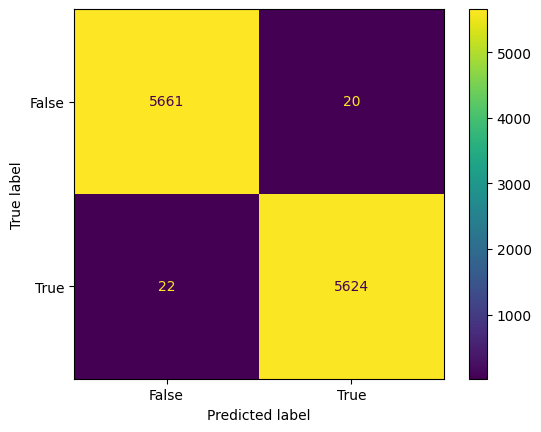

In [48]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'kernel': ['linear', 'rbf'], 'C':[1,2,3,6]}

In [51]:
xgb_cv= GridSearchCV(xgb, params)

In [52]:
xgb_cv.fit(X_train,y_train)

[15:18:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[15:18:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[15:18:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[15:18:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[15:18:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not us

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='(

In [53]:
y_pred_cv = xgb_cv.predict(X_test)

In [54]:
print("test_accuracy:" ,accuracy_score(y_test,y_pred_cv))

test_accuracy: 0.9980577381477884


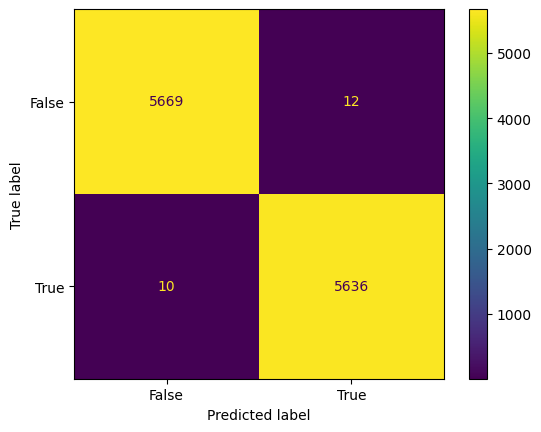

In [55]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_cv)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [59]:
import pickle

In [60]:
pickle.dump(xgb,open("xgb.pkl","wb"))

In [61]:
pickle.dump(rfc,open("rfc.pkl","wb"))